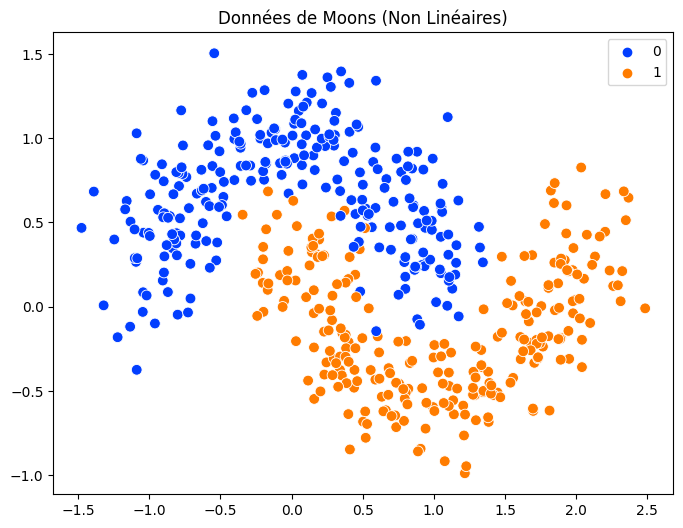

In [2]:
from sklearn.datasets import make_moons, make_classification
import seaborn as sns
import matplotlib.pyplot as plt

# Générer les données non linéaires
X, y = make_moons(n_samples=500, random_state=42, noise=0.2)
from sklearn.model_selection import train_test_split


# Tracer les données
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="bright", s=60)
plt.title("Données de Moons (Non Linéaires)")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Créer la figure et les sous-graphiques
# Définir une grille pour visualiser la frontière de décision
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
                     np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100))
x_,y_ = xx.ravel(), yy.ravel()

In [ ]:
from weighted_svm import WeightedSVM
model = WeightedSVM(kernel='linear')
model.fit(X_train, y_train)
print(len(model.alpha))
# Tracer la frontière de décision et les données
Z_my = model.predict(np.c_[x_,y_])
Z_my = Z_my.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_my, alpha=0.8, cmap="Blues_r")
plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train, cmap="Blues_r", s=6, edgecolor='k')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='r', label='Support Vectors')
plt.show()


NameError: name 'X_i' is not defined

In [22]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import ParameterGrid
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]
kernel_values = "rbf"
param_grid = ParameterGrid({'c': C_values, 'gamma': gamma_values})
result = dict()
iter = 0
for param in param_grid:
    iter += 1
    model = SVM_C(kernel='poly', c=param['c'], gamma=param['gamma'])
    model.fit(X_train, y_train)
    result[iter] = {'c': param['c'], 'gamma': param['gamma'],'train_score': model.get_score(X_train, y_train), 'test_score': model.get_score(X_test, y_test), 'nb alpha': len(model.alpha)}
    if iter%10==0:
        print(f"iteration {iter}/{len(param_grid)} done")
df_result = pd.DataFrame(result).T


Arrêt de convergence à l'itération 209


In [23]:
df_result["overfit"] = np.where(df_result["test_score"] - df_result["train_score"]>=0, 1 , -1)
df_result["score"] = df_result['overfit'] * df_result["test_score"]
pivot = df_result.pivot_table(index='c', columns='gamma', values='score')
df_result.sort_values(by="score", ascending=False, inplace=True)
print(df_result.head(20))

      c  gamma  train_score  test_score  nb alpha  overfit  score
4   1.0    0.1         0.75        0.80     343.0        1   0.80
7  10.0    0.1         0.75        0.80     343.0        1   0.80
1   0.1    0.1         0.71        0.77     350.0        1   0.77
2   0.1    1.0         0.37        0.33     144.0       -1  -0.33
5   1.0    1.0         0.39        0.37     110.0       -1  -0.37
8  10.0    1.0         0.40        0.38      93.0       -1  -0.38
3   0.1   10.0         0.42        0.40      95.0       -1  -0.40
6   1.0   10.0         0.42        0.40      95.0       -1  -0.40
9  10.0   10.0         0.42        0.40      95.0       -1  -0.40


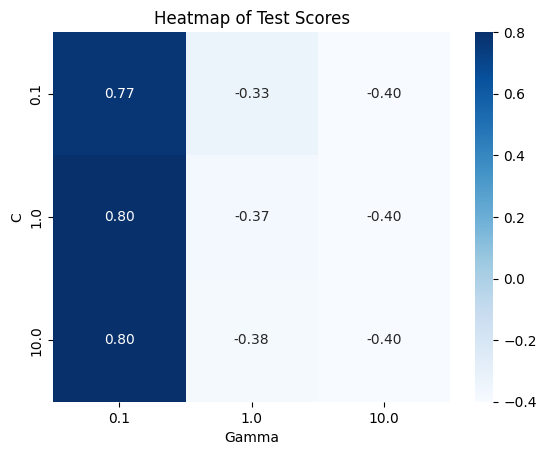

In [24]:
plt.figure()
sns.heatmap(pivot, annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap of Test Scores')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

In [14]:
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]
param_grid = ParameterGrid({'C': C_values, 'gamma': gamma_values})
# Set up plot grid dimensions
n_plots = len(param_grid)  # Limit to 16 plots for readability
n_cols = int(np.sqrt(n_plots))
n_rows = int(np.ceil(n_plots / n_cols))


 # Define mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

plot 0 computed
plot 1 computed
plot 2 computed
plot 3 computed
plot 4 computed
plot 5 computed
plot 6 computed
plot 7 computed
plot 8 computed


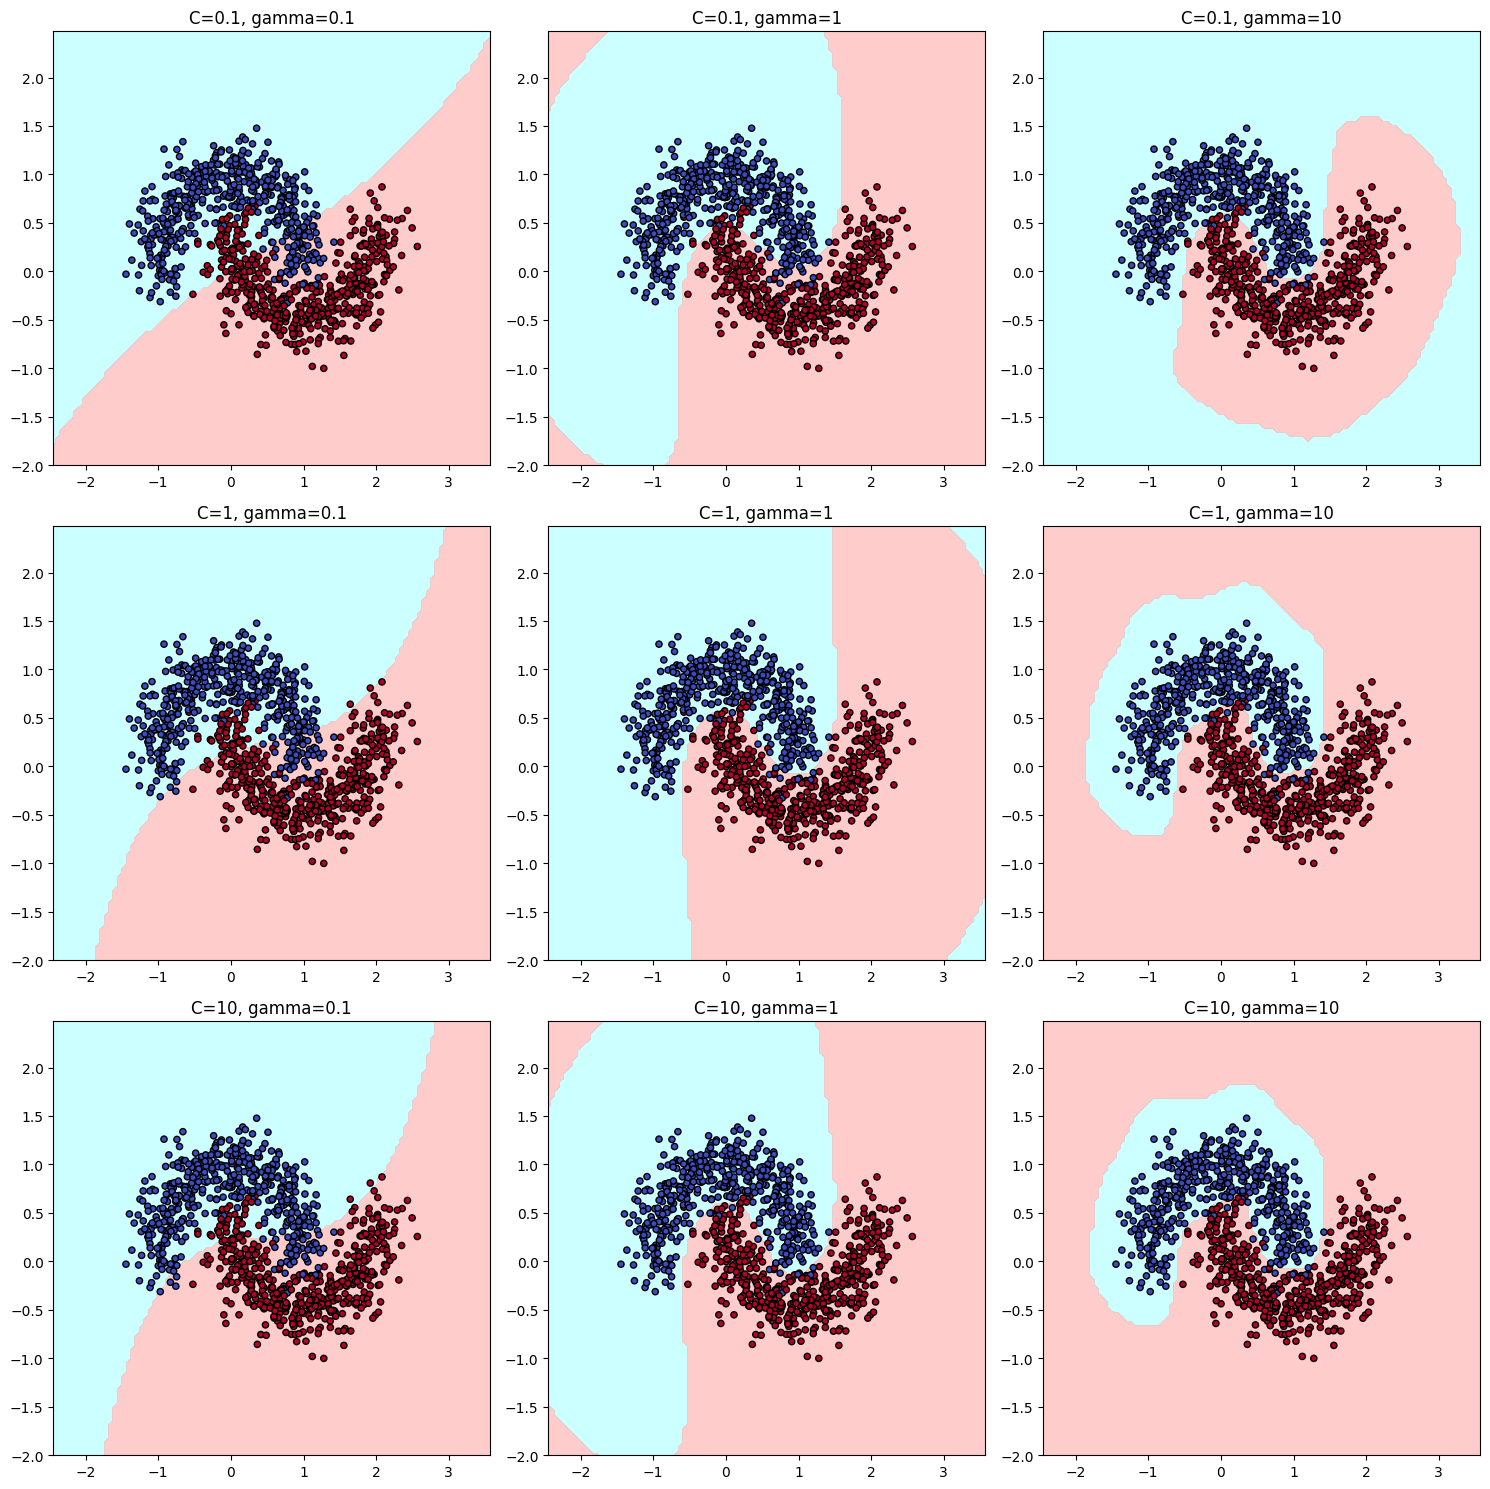

In [16]:

# Create figure for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()  # Flatten axes array for easy indexing
# Grid search and plot each combination of C and gamma
for idx, params in enumerate(param_grid):
    if idx >= n_plots:
        break  # Only plot the first 16 combinations

    # Initialize and train SVM with SMO optimizer on the current parameters
    svm = SVM_C(kernel="rbf", learning_rate=0.001,degree=3, c=params['C'], gamma=params['gamma'])
    svm.fit(X, y)

    # Plot the decision boundary
    ax = axes[idx]
    ax.set_title(f"C={params['C']}, gamma={params['gamma']}")

    # Calculate decision function for each point in the mesh grid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and data points
    ax.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.6, colors=["#AAFFFF", "#FFAAAA", "#AAAAFF"])
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
    print(f"plot {idx} computed")

# Hide any unused subplots
for ax in axes[idx+1:]:
    ax.axis('off')

# Display the plots
plt.tight_layout()
plt.show()